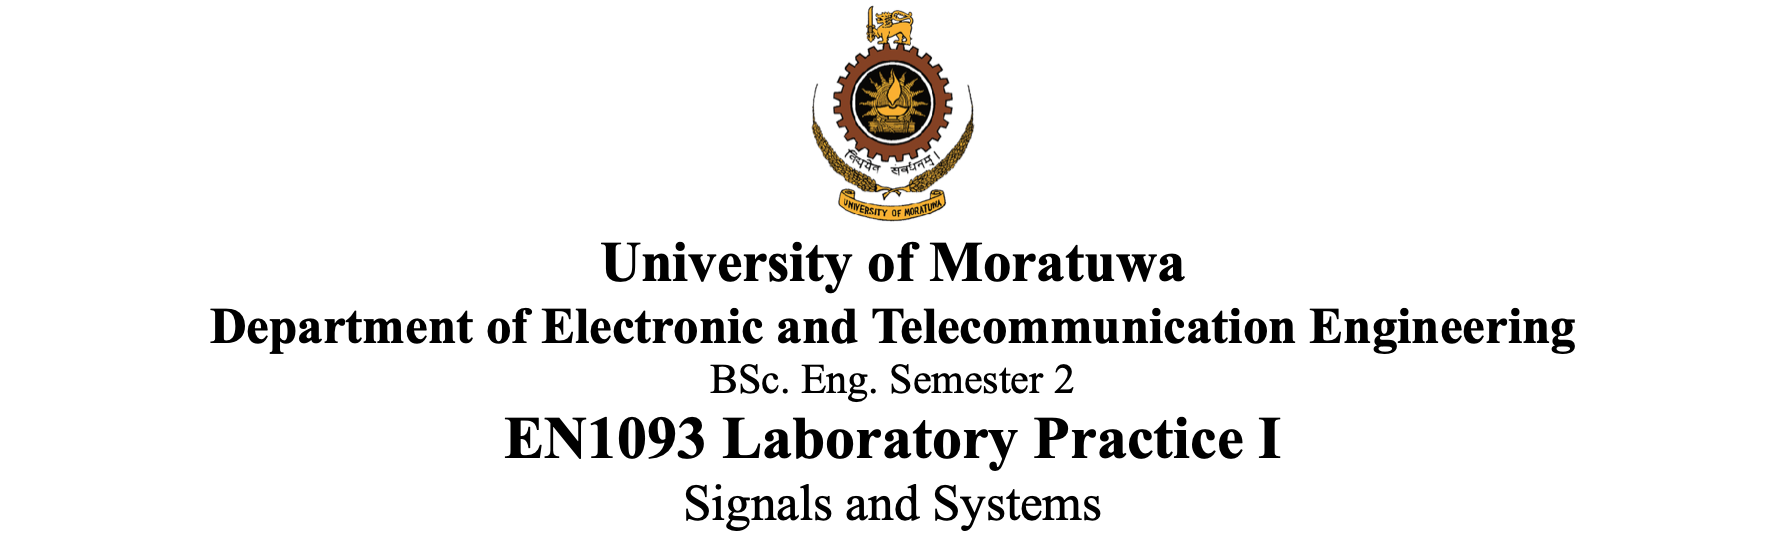

# Introduction to Google Colaboratory


## What is Google Colaboratory?

Google Colaboratory, or “Colab” for short, is a product from Google Research. Colab allows anybody to write and execute arbitrary python code through the browser, and is especially well suited to machine learning, data analysis and education. More technically, Colab is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources including GPUs. [1]


## Why are we going to use Google Colab? 

Due to the prevailing situation in the country due to the COVID-19 pandemic, the ENTC academic staff has decided to move all the laboratory sessions to online platforms. While this initiative aligns well with the COVID-19 related safety regulations, we hope that it would be a great experience for you to get familiar with useful online tools such as Google Colab.

In this semester, we will be using Colab to conduct your lab classes associated with **EN1060: Signals and Systems**. Through these lab classes, we are hoping to provide you an first-hand practical experience in important concepts such as convolution, linear time-invariant systems, frequency response, filters, sampling, aliasing, and many more. 

## What's the purpose of this session? 

In this session, you will get an opportunity to be exposed to several functionalities of Colab that will come handy in the upcoming lab classes. Therefore, remember to keep this colab file with you, so that you can use the content here as an aid to lab sessions you will be completing in the coming weeks.

## Colab Shortcuts

The following shortcuts would make it easier for you to use colab effectively. You access the colab shortcuts by pressing Ctrl/⌘ + M + H

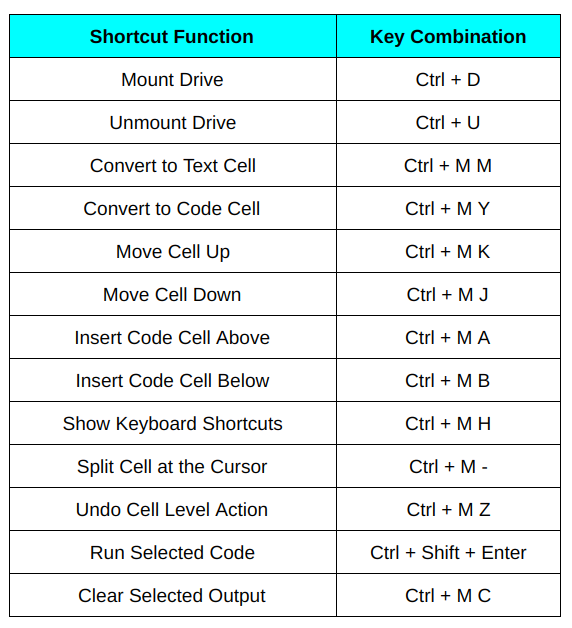

## Mounting the Google Drive

Run the following code snippet to mount your google drive in to the virtual machine provided by colab. After running this cell, you will have to enter a authorization code obtained through logging in to your google account.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Navigating in the Virtual Machine using Simple Linux Shell Commands

Use the follwing command to print the current directory you are in.

In [ ]:
! pwd

Use the following command to access a specific folder.

In [ ]:
% cd /content/drive

Use the following command to list the content in the folder you just accessed.

In [ ]:
! ls

Now, use this command to navigate to the folder you added to your google drive in the begining of this session and display the content of that folder. 

Note : To obtain the the path of this folder, you can click the folder icon on the vertical ribbon in the left side of the screen.

In [ ]:
### Enter command ###

### Enter command ###

In [ ]:
### Enter command ###

### Enter command ###

Great work! you know how to mount the Google Drive to the Colab virtual machine and navigate through your files using linux commands.

## Coding with Colab

The most significant function of Colab is the fact that you can code in python and and run those codes. For example, run this cell to print "Hello World" in python.

In [ ]:
print("Hello World")

Enter a code below and run it to create a right angled triangle of stars (base : 5 asterisk, height 7 asterisk)

In [ ]:
### Enter Code ###

### Enter Code ###

## Markdown with Colab

Another cool feature colab possesses is thet fact that you can enter texts and images using Markdown. Let's try the following examples.

### **1) You can add headings using the "#" prefix**

# Heading 1

## Heading 2

### Heading 3

### **2) You can Bold, Italicize and Underline Texts as well.**

“This is a new day, a new beginning.” – Ahsoka Tano

<u>“This is a new day, a new **beginning**.” – *Ahsoka Tano*</u>

### **3) You can type in equations using $\LaTeX$** [2]

$$ \int_a^b f'(x) = f(b) - f(a) $$

### **4) You can add images too!**

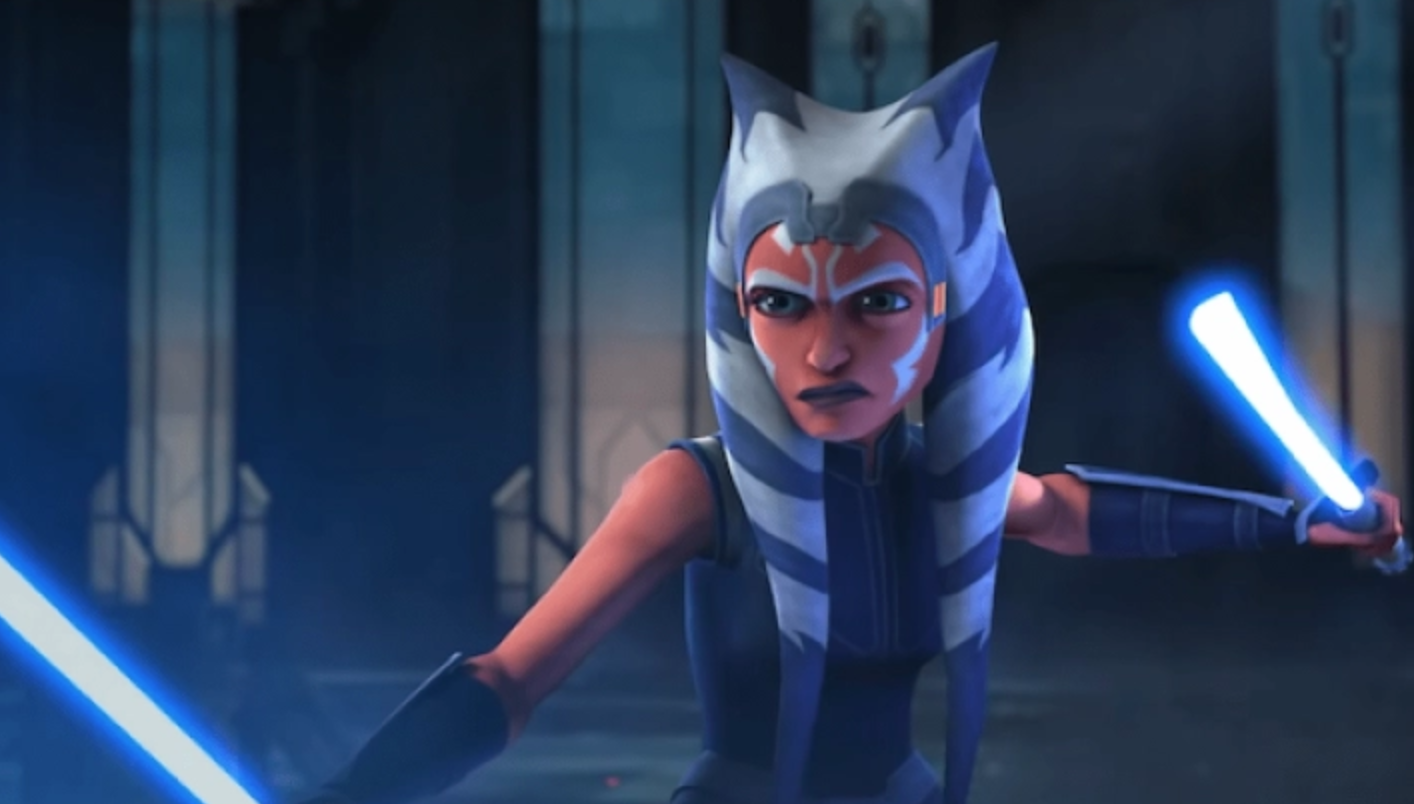

In [2]:
from IPython.display import Image
Image(filename='image.png')

## Installing and Importing Python Libraries

In the lab classes, you will have to install and important several useful python libraries such as numpy, scipy, pyaudio, etc., in order to complete the tasks successfully. Therefore, you have to be familiar with installing libraries and import them when needed.

Let's import numpy and scipy first. Since they are frequently used libraries in many programming tasks, they are already available in colab. Thus, there's no need to speciically install them.

In [ ]:
import numpy as np
import scipy as sp

Let's try to import the pyaudio library that helps you to open and save audio files, which are useful tasks that you have to execute in your lab classes.

In [ ]:
import pyaudio

Now you can see that this library is not available in the colab runtime. Therefore, you have install it manually. Almost all the time, you can find a python library in the pypi.org. In this case, PyAudio can be found in the the following link :  https://pypi.org/project/PyAudio/0.2.8/

But in the case of pyaudio, you have to install several dependencies on which pyaudio relies on. To install them, run the following cell.

Note : Not all python libraries require such external dependencies. In this case, pyaudio is an exception.

In [ ]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg

After installing these dependencies, you can now install the pyaudio library using the command you obtained from https://pypi.org/project/PyAudio/0.2.8/

In [ ]:
### Enter Command ###

### Enter Command ###

With that, now you are be able to import PyAudio.

In [ ]:
### Enter Code ###

### Enter Code ###

## Handling Audio Files with Colab

In the upcoming lab classes, you will get to apply several interesting signal processing techniques on certain audio files and observe the changes caused by such techniques. 

In order to do so, you have to know how to open, play, and save the audio files using python. To this end, we can use python's wave library.

We'll first start by importing wave, pyaudio, and several other important libraries.

In [ ]:
import wave
import pyaudio
from IPython.display import Audio
import numpy as np

Run the following cell to open the audio file.

In [ ]:
# play
Audio("power_of_love_original.wav")

Let's add some changes (an echo effect) to this audio.

In [ ]:
# add an echo effect to the original audio
CHUNK = 8820 # 44100 = 1 s
wf = wave.open("power_of_love_original.wav", 'r')

p = pyaudio.PyAudio()
nchannels=wf.getnchannels()

stream = np.array(np.zeros(nchannels), dtype=np.int16) # init stream
data = wf.readframes(CHUNK)

dtype = '<i2' # little-endian two-byte (int16) signed integers

sig = np.frombuffer(data, dtype=dtype).reshape(-1, nchannels)
signal_chunk = np.asarray(sig)

delayed = np.zeros(signal_chunk.shape, dtype=dtype)

alpha = 1
while data != '' and signal_chunk.shape[0] == CHUNK :

    modified_signal_chunk = alpha*signal_chunk + (1. - alpha)*delayed
    modified_signal_chunk_int16 = modified_signal_chunk.astype(np.int16)
    stream = np.vstack((stream, modified_signal_chunk_int16)) # append modified to stream
    delayed = signal_chunk
    data = wf.readframes(CHUNK)
    sig = np.frombuffer(data, dtype=dtype).reshape(-1, nchannels)
    signal_chunk = np.asarray(sig)
    

stream = stream[1:] # pop stream init
byte_stream = stream.tobytes() # np array to bytes 
p.terminate()
wf.close()

Then you can save this new audio into a new file using the following code.

In [ ]:
# write the new audio to a new file
wfo = wave.open("power_of_love_echo.wav", 'wb') # writing the bot stream to a output wav file
wfo.setnchannels(nchannels)
wfo.setsampwidth(wf.getsampwidth())
wfo.setframerate(wf.getframerate())
wfo.writeframes(byte_stream)
wfo.close()

After that, you can use the following code snippet to play your audio file.

In [ ]:
# play the new audio
Audio('power_of_love_echo.wav')

# Handling Image Files with Colab

In the lab classes, you will also get to write answers on paper (for instance, proofs of mathematical formulae). In order for us to evaluate them, you should upload them to the colab file of the corresponding lab class. Let's see how we can proceed with that.

First, you should write your answers on a paper and scan / take a photo of it. After that, you can use the following codes to display your answer on the colab file.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Then, you can display the image using markdown code you learnt earlier. Enter the markdown code below to display the image you uploaded above.

In [ ]:
### Enter Code ###

### Enter Code ###

## References

[1] web-link : https://research.google.com/colaboratory/faq.html#:~:text=Colaboratory%2C%20or%20%E2%80%9CColab%E2%80%9D%20for,learning%2C%20data%20analysis%20and%20education.

[2] Overleaf $\LaTeX$ Tutorials : https://www.overleaf.com/learn/latex/Tutorials